# Understand the number of MILP calls

In [12]:
import sys
sys.path.append('../../')

from os import listdir
from time import time
import numpy as np
from matplotlib import pyplot as plt


import pickle as pkl



%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Customize sequential_HybridSIPP to count the MILP calls
from panav.HybridSIPP import HybridSIPP
def sequential_HybridSIPP(HG,return_graph = False,Delta = 2.0, Kmax = 3,return_on_failure=True):
    
    agents = np.arange(len(HG.start_nodes))
    graph_plans = []
    continuous_plans = []

    U = {e:[] for e in HG.edges} # Edge traversal times
    C = {s:[] for s in HG} # Node visit times

    MILP_calls = 0
    straight_calls = 0

    def update_traversal_records(U,C,gp):
        
        for s,t in gp:
            C[s].append(t)
        
        k = len(gp)
        for i in range(k-1):
            s,t = gp[i]
            sp,tp  = gp[i+1]
            U[s,sp].append((t,tp))
        return U,C
            

    for a in agents:
        print(a)
        t0 = time()

        result = None
        for Km in range(Kmax+1):
            print('Km=',Km)

            data_record_dict = {}

            result = HybridSIPP(HG,U,C,HG.start_nodes[a],HG.goal_nodes[a],continuous_plans,Delta,
                                Kmax=Km,
                                data_record_dict=data_record_dict)
            if result is not None:
                break
            
        if result is not None:
            gp,cp = result
        else:
            print("Solver failed.")
            if return_on_failure:
                break
            else:
                return None
        
        print('Solve time',time()-t0)
        
        U,C = update_traversal_records(U,C,gp)
        graph_plans.append(gp)
        continuous_plans.append(cp)

        MILP_calls += data_record_dict['MILP_calls']
        straight_calls +=  data_record_dict['straight_calls']

    return MILP_calls,straight_calls

In [26]:
def get_env_name(filename):
    fs = filename.split('.')
    return fs[0]


# Load environment presets
env_names = [get_env_name(fn) for fn in listdir('./envs')]

env_infos = {}

for name in env_names:
    with open(f'./envs/{name}.pkl','rb') as fp:
        env_infos[name] = pkl.load(fp)

In [29]:
env_names

['MultiTunnel', 'Room', 'SingleTunnel', 'Warehouse']

In [15]:

bloating_r = 0.5
vmax = 1.0

TIMEOUT = 200


In [ ]:

MILP_calls = {}
straight_calls ={}


In [32]:
save_file = './data/NumCallAnalysis.pkl' 


N_range = np.arange(2,21,2)

# env_names = ['SingleTunnel', 'Warehouse']
env_names = ['MultiTunnel', 'Room']
for env_name in env_names:
    env_info = env_infos[env_name]
    MILP_calls[env_name] = []
    straight_calls[env_name] = []
    for N in N_range: 
        # Construct the environment
        constructor = env_info['constructor']
        specs = env_info['specs']

        print('Building the environment...')
        print(env_name)
        HG = constructor(**specs,N_agent = N)

        mc, sc = sequential_HybridSIPP(HG,Kmax = 5,Delta=3.0,return_on_failure=False)

        MILP_calls[env_name].append(mc)
        straight_calls[env_name].append(sc)

        with open(save_file,'wb') as fp:
            pkl.dump(dict(MILP_calls=MILP_calls,straight_calls=straight_calls),fp)

Building the environment...
MultiTunnel


/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


0
Km= 0
Solve time 0.005942106246948242
1
Km= 0
Solve time 0.003281116485595703
Building the environment...
MultiTunnel
0
Km= 0
Solve time 0.004817962646484375
1
Km= 0
Solve time 0.00479578971862793
2
Km= 0
Solve time 0.005168914794921875
3
Km= 0
Solve time 0.004657268524169922
Building the environment...
MultiTunnel
0
Km= 0
Solve time 0.006411075592041016
1
Km= 0
Solve time 0.006945133209228516
2
Km= 0
Solve time 0.00551915168762207
3
Km= 0
Solve time 0.007191181182861328
4
Km= 0
Solve time 0.005574226379394531
5
Km= 0
Solve time 0.005380868911743164
Building the environment...
MultiTunnel
0
Km= 0
Solve time 0.006290912628173828
1
Km= 0
Solve time 0.006371021270751953
2
Km= 0
Solve time 0.00678706169128418
3
Km= 0
Solve time 0.0068111419677734375
4
Km= 0
Solve time 0.010010957717895508
5
Km= 0
Solve time 0.007487773895263672
6
Km= 0
Solve time 0.008111953735351562
7
Km= 0
Solve time 0.007177829742431641
Building the environment...
MultiTunnel
0
Km= 0
Solve time 0.008833885192871094
1


/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/cvxpy/problems/problem.py:1391: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


Km= 2
Solve time 0.8534510135650635
9
Km= 0
Solve time 0.008677005767822266
Building the environment...
MultiTunnel
0
Km= 0
Solve time 0.00855708122253418
1
Km= 0
Solve time 0.010117292404174805
2
Km= 0
Solve time 0.008931636810302734
3
Km= 0
Solve time 0.009921073913574219
4
Km= 0
Solve time 0.01143193244934082
5
Km= 0
Solve time 0.008616924285888672
6
Km= 0
Solve time 0.010293006896972656
7
Km= 0
Solve time 0.010065793991088867
8
Km= 0
Solve time 0.010548114776611328
9
Km= 0
Solve time 0.010704994201660156
10
Km= 0
Solve time 0.00941014289855957
11
Km= 0
Solve time 0.013257026672363281
Building the environment...
MultiTunnel
0
Km= 0
Solve time 0.010444879531860352
1
Km= 0
Solve time 0.010359048843383789
2
Km= 0
Solve time 0.010400056838989258
3
Km= 0
Solve time 0.009975910186767578
4
Km= 0
Solve time 0.012903928756713867
5
Km= 0
Solve time 0.011068105697631836
6
Km= 0
Solve time 0.010709047317504883
7
Km= 0
Solve time 0.01100015640258789
8
Km= 0
Solve time 0.011630773544311523
9
Km= 

In [53]:


with open(save_file,'rb') as fp:
   data = pkl.load(fp)

MILP_calls = data['MILP_calls']
straight_calls = data['straight_calls']

SingleTunnel


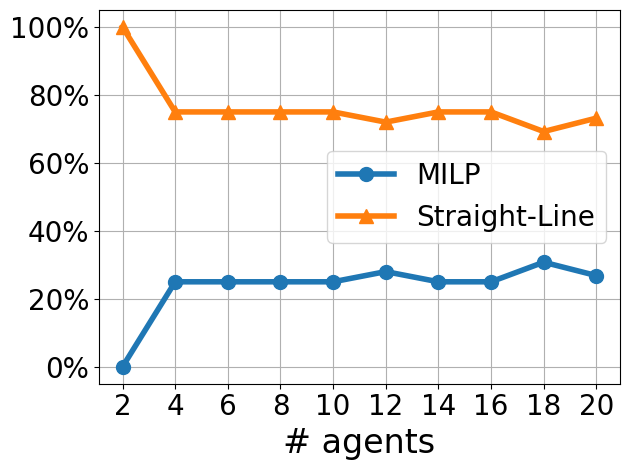

Warehouse


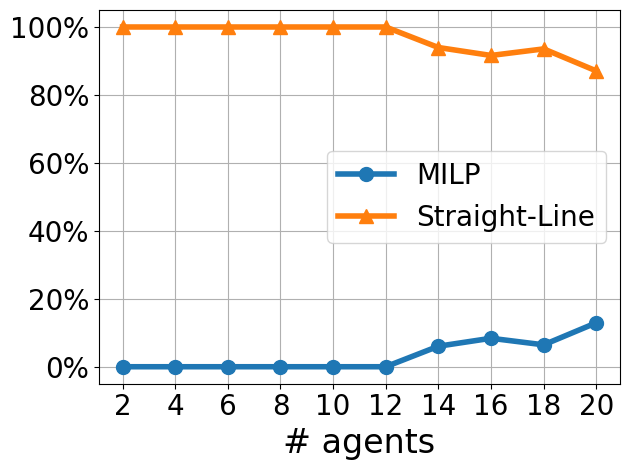

MultiTunnel


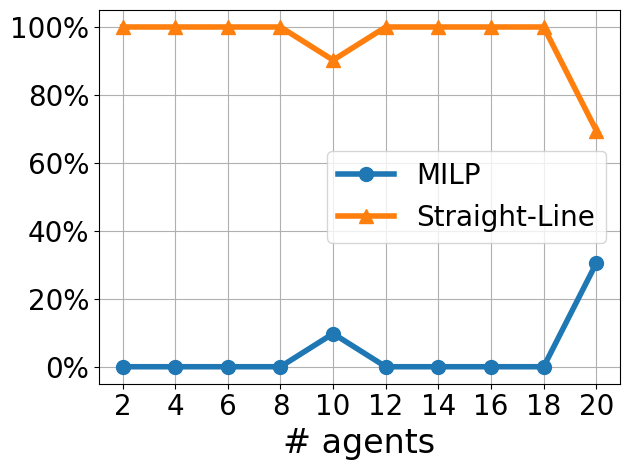

Room


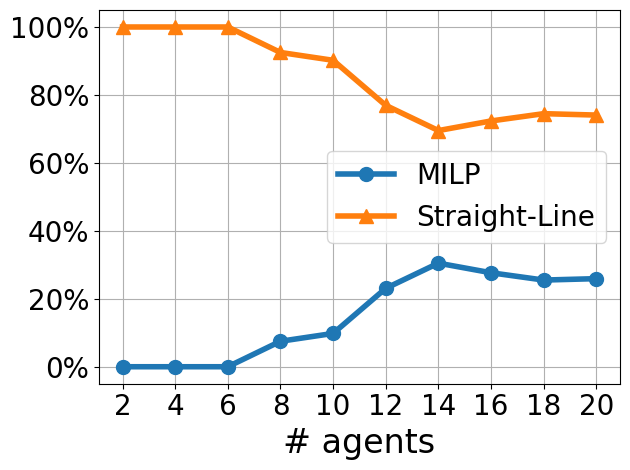

In [83]:
from matplotlib.ticker import PercentFormatter

for name in MILP_calls:
    print(name)
    mcs = np.array(MILP_calls[name])
    scs = np.array(straight_calls[name])
    cs = mcs+scs
    plt.plot(N_range,mcs/cs * 100,label='MILP',marker = "o",lw = 4,markersize = 10)
    plt.plot(N_range,scs/cs * 100,label='Straight-Line',marker = "^",lw = 4,markersize = 10)
    plt.xlabel("# agents",fontsize = 24)
    plt.xticks(N_range, fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(prop={'size':20})

    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.grid('on')
    plt.tight_layout()
    plt.savefig(f'./simFigures/NumCall/{name}_percentage.pdf')
    plt.show()

SingleTunnel
Warehouse
MultiTunnel
Room


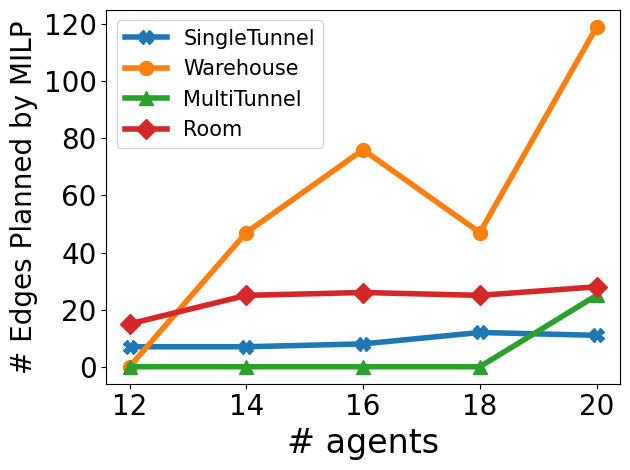

In [88]:
markers = ["X","o","^","D"]
for name,mk in zip(MILP_calls,markers):
    print(name)
    mcs = np.array(MILP_calls[name])
    plt.plot(N_range[5:],mcs[5:],label=name,marker = mk,lw = 4,markersize = 10)

plt.xticks(N_range[5:],fontsize=20)
plt.yticks(fontsize = 20)

plt.xlabel("# agents",fontsize = 24)
plt.ylabel("# Edges Planned by MILP",fontsize = 20)

plt.legend(prop={'size':15})
plt.tight_layout()


plt.savefig('./simFigures/NumCall/MILP_Calls.pdf')
plt.show()

SingleTunnel
Warehouse
MultiTunnel
Room


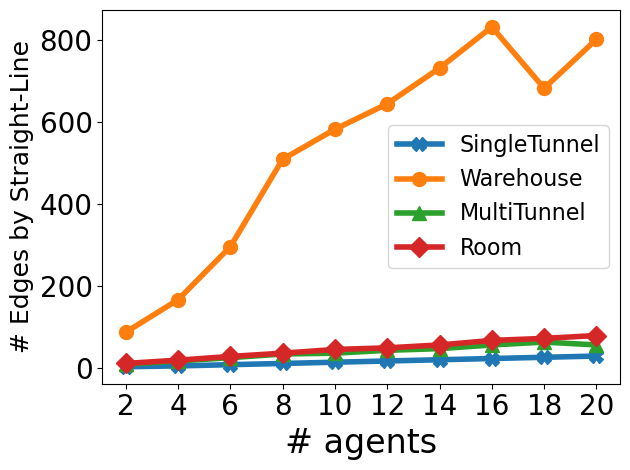

In [91]:
for name,mk in zip(straight_calls,markers):
    print(name)
    mcs = np.array(straight_calls[name])
    plt.plot(N_range,mcs,label=name,marker = mk,lw = 4,markersize = 10)

plt.xticks(N_range,fontsize = 20)
plt.yticks(fontsize = 20)

plt.xlabel("# agents",fontsize = 24)
plt.ylabel("# Edges by Straight-Line",fontsize = 18)
plt.legend(prop={'size':16})
plt.tight_layout()

plt.savefig('./simFigures/NumCall/Straight_Calls.pdf')
plt.show()